In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv("F://BE project//Data//DataFiles//prophetbin1.csv",names=['Timestamp','FillLevel','BinId'])

In [3]:
df.head()

,Timestamp,FillLevel,BinId
0,2021-03-15T00:00:00.000Z,23,bin1
1,2021-03-15T00:05:00.000Z,23,bin1
2,2021-03-15T00:10:00.000Z,0,bin1
3,2021-03-15T00:15:00.000Z,23,bin1
4,2021-03-15T00:20:00.000Z,0,bin1


In [4]:
df.describe()

,FillLevel
count,1440.000000
mean,48.508333
std,27.849715
min,0.000000
25%,23.000000
50%,52.000000
75%,71.000000
max,100.000000


In [5]:
df.dtypes

Timestamp    object
FillLevel     int64
BinId        object
dtype: object

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].dt.tz_convert(None)

In [7]:
df.dtypes

Timestamp    datetime64[ns]
FillLevel             int64
BinId                object
dtype: object

In [8]:
df.drop(['BinId'],axis=1,inplace=True)
df.columns = ['ds','y']
df.head()

,ds,y
0,2021-03-15 00:00:00,23
1,2021-03-15 00:05:00,23
2,2021-03-15 00:10:00,0
3,2021-03-15 00:15:00,23
4,2021-03-15 00:20:00,0


# 2. Train Model

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


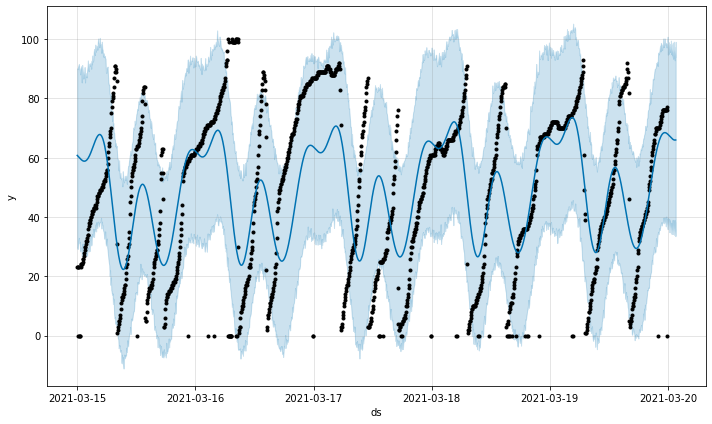

In [9]:
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=100,freq='min')
fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
type(fcst)

pandas.core.frame.DataFrame

In [15]:
fcst.drop(['trend','yhat_lower','yhat_upper','trend_lower','trend_upper','additive_terms','additive_terms_lower', 'additive_terms_upper', 'daily', 'daily_lower', 'daily_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'], axis=1,inplace= True)
fcst.to_json()
fcst

,ds,yhat
0,2021-03-15 00:00:00,60.791758
1,2021-03-15 00:05:00,60.655597
2,2021-03-15 00:10:00,60.511590
3,2021-03-15 00:15:00,60.361909
4,2021-03-15 00:20:00,60.208740
...,...,...
1535,2021-03-20 01:31:00,65.975306
1536,2021-03-20 01:32:00,65.979917
1537,2021-03-20 01:33:00,65.985439
1538,2021-03-20 01:34:00,65.991878


In [11]:
fcst.to_csv('forecast.csv')